## Module 2, Step 2 : Create Binary Classification Model
### Import Library

In [1]:
import tensorflow as tf
import json, sys
import matplotlib.pyplot as plt
# sys.path.append("/usr/grading")
# import grad

### Read Credential

In [2]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [3]:
base_dir = "./dataset"

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.5
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.5
)

In [17]:
img_shape = (150, 150, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=8,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=2,
    subset='validation')

Found 12 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [18]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                663568    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

### Model Training

In [19]:
# Cek Available RAM terlebih dahulu
!free -h

              total        used        free      shared  buff/cache   available
Mem:           3,9G        3,1G        546M         30M        258M        605M
Swap:          1,9G        1,7G        227M


In [18]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

[sudo] password for trainercv: 

In [21]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 10, 
                      validation_data = validation_generator, 
                      verbose = 1)

Epoch 1/10
2/2 [==============================] - 2s 450ms/step - loss: 2.1952 - accuracy: 0.5000 - val_loss: 9.1501 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 0s 205ms/step - loss: 2.2355 - accuracy: 0.5000 - val_loss: 0.8830 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 192ms/step - loss: 0.6386 - accuracy: 0.5833 - val_loss: 0.7727 - val_accuracy: 0.5556
Epoch 4/10
2/2 [==============================] - 0s 165ms/step - loss: 0.4612 - accuracy: 0.6667 - val_loss: 0.9419 - val_accuracy: 0.5556
Epoch 5/10
2/2 [==============================] - 0s 227ms/step - loss: 0.2817 - accuracy: 1.0000 - val_loss: 0.8265 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 0s 237ms/step - loss: 0.2306 - accuracy: 1.0000 - val_loss: 0.8078 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 206ms/step - loss: 0.1835 - accuracy: 1.0000 - val_loss: 0.8721 - val_accuracy: 0.6667
Epoch 8/10
2/2 [====

### Model Evaluation

In [22]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]*100}%\nLoss test = {stats[0]*100}%')

5/5 [==============================] - 0s 9ms/step - loss: 0.3115 - accuracy: 0.8889
Accuracy test = 88.88888955116272%
Loss test = 31.150051951408386%


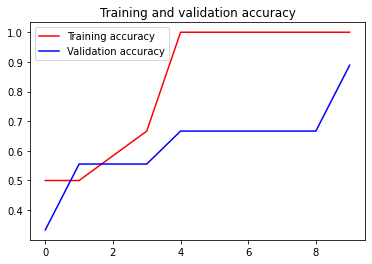

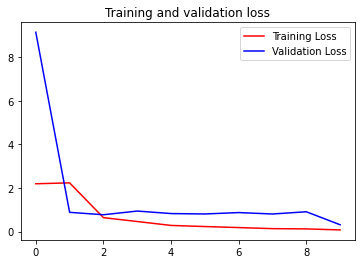

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
validation_generator.class_indices

{'blue': 0, 'green': 1, 'red': 2}

### Model Saving

In [25]:
model.save('model_module-3.h5')

### Grading

In [ ]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
grad.doGrade(usermail, 1, 2, stats)